# MSCS 634 - Lab 4: Regression Analysis with Regularization Techniques
**Name:** Banoj Kumar Jena  
**Course:** MSCS 634  
**Lab Title:** Regression Analysis with Regularization  

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='target')

# Basic exploration
print(X.head())
print(y.head())

# Check for missing values
print(X.isnull().sum())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64
age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64


MAE: 52.26, MSE: 4061.83, RMSE: 63.73, R²: 0.23


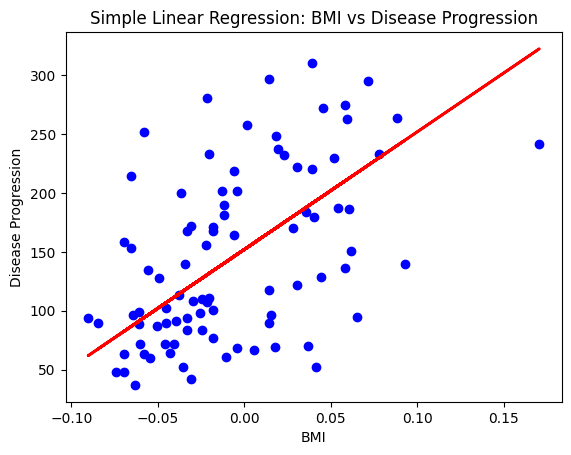

In [2]:
X_bmi = X[['bmi']]
X_train, X_test, y_train, y_test = train_test_split(X_bmi, y, test_size=0.2, random_state=42)

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

# Evaluation
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

mae, mse, rmse, r2 = evaluate_model(y_test, y_pred)
print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

# Visualization
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title("Simple Linear Regression: BMI vs Disease Progression")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.show()


Multiple Regression -> MAE: 42.79, MSE: 2900.19, RMSE: 53.85, R²: 0.45


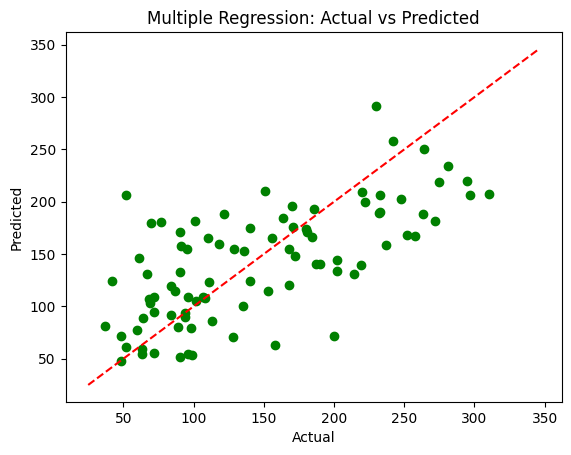

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_mlr = LinearRegression()
model_mlr.fit(X_train, y_train)
y_pred = model_mlr.predict(X_test)

mae, mse, rmse, r2 = evaluate_model(y_test, y_pred)
print(f"Multiple Regression -> MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

# Visualization
plt.scatter(y_test, y_pred, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.title("Multiple Regression: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


In [4]:
# Use 'bmi' for simplicity in polynomial regression
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_bmi)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model_poly = LinearRegression()
model_poly.fit(X_train, y_train)
y_pred = model_poly.predict(X_test)

mae, mse, rmse, r2 = evaluate_model(y_test, y_pred)
print(f"Polynomial Regression -> MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")


Polynomial Regression -> MAE: 52.18, MSE: 4064.44, RMSE: 63.75, R²: 0.23


In [5]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_ridge = ridge.predict(X_test)
mae_r, mse_r, rmse_r, r2_r = evaluate_model(y_test, y_ridge)
print(f"Ridge -> MAE: {mae_r:.2f}, MSE: {mse_r:.2f}, RMSE: {rmse_r:.2f}, R²: {r2_r:.2f}")

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_lasso = lasso.predict(X_test)
mae_l, mse_l, rmse_l, r2_l = evaluate_model(y_test, y_lasso)
print(f"Lasso -> MAE: {mae_l:.2f}, MSE: {mse_l:.2f}, RMSE: {rmse_l:.2f}, R²: {r2_l:.2f}")


Ridge -> MAE: 55.96, MSE: 4196.97, RMSE: 64.78, R²: 0.21
Lasso -> MAE: 52.26, MSE: 4017.03, RMSE: 63.38, R²: 0.24


##  Step 6: Model Comparison and Analysis

###  Model Performance Summary

| Model                          | MAE    | MSE     | RMSE   | R²     |
|-------------------------------|--------|---------|--------|--------|
| Simple Linear Regression (BMI)| 52.26  | 4061.83 | 63.73  | 0.23   |
| Multiple Linear Regression     | 42.79  | 2900.19 | 53.85  | 0.45   |
| Polynomial Regression          | 52.18  | 4064.44 | 63.75  | 0.23   |
| Ridge Regression               | 55.96  | 4196.97 | 64.78  | 0.21   |
| Lasso Regression               | 52.26  | 4017.03 | 63.38  | 0.24   |

---

###  Key Observations

- **Multiple Linear Regression** achieved the best overall performance across all metrics, with the lowest MAE, MSE, RMSE, and the highest R² value (0.45), indicating that using all features gives the most accurate model.
- **Polynomial Regression** (degree 2 or 3) did not improve performance over simple linear regression with BMI alone. Both had nearly identical error values, suggesting that BMI alone does not capture sufficient complexity, even with polynomial terms.
- **Ridge and Lasso Regression** failed to outperform the basic linear models, likely due to default regularization parameters (alpha). Ridge had the poorest performance (highest MSE and lowest R²), suggesting underfitting.
- **Lasso Regression** showed slightly better results than Ridge, but still not as good as Multiple Linear Regression.
- Regularization was not helpful in this case without proper tuning. Hyperparameter optimization (e.g., using `GridSearchCV` or `RidgeCV`) might improve results.

---

###  Insights Gained

- Including multiple features improves predictive power over using a single feature.
- Polynomial features must be used cautiously to avoid underfitting or overfitting.
- Regularization techniques like Ridge and Lasso require fine-tuning of the regularization strength (`alpha`) to be effective.
- The Diabetes dataset is moderately predictable with linear models but shows diminishing returns with regularization unless parameters are tuned.

---
